In [2]:
import os

from matplotlib import pyplot as plt

from src.fish import find_fish_props
from src.models import InputImage
from src.well import find_well_props

In [3]:
uniform_fig = (60, 40)

In [4]:
def plot_images(images, cols: int = None, count: int = None, fig: (int, int) = (16, 16), ticks=False, cmap='binary',
                title=None, hist=False, nums=False):
    if count is not None:
        images = images[0:count]

    l = len(images)

    if cols is None:
        cols = 4

    rows = int(l / cols)
    if l < cols: cols = l
    if l % cols != 0 or rows == 0:
        rows += 1

    fig, ax = plt.subplots(rows, cols, figsize=fig)
    ax = ax.ravel()
    for i, img in enumerate(images):
        if i >= l: return

        if nums: ax[i].set_title(f'#{i}')

        if not hist:
            ax[i].imshow(img, cmap)
            if not ticks:  # turn off ticks
                ax[i].get_xaxis().set_visible(False)
                ax[i].get_yaxis().set_visible(False)
        else:
            ax[i].hist(img.ravel(), bins=256)
    fig.suptitle(title, fontsize=56)
    plt.tight_layout()


def plot_fishes(fishes, cols: int = None, count: int = None, fig: (int, int) = (16, 16), ticks=False, cmap='binary'):
    images = list(map(lambda x: x.processed, fishes))  # Change this!
    plot_images(images, cols, count, fig, ticks, cmap)

In [5]:
from src.utils import normalize_0_255

os.chdir('C:\\Users\\gimes\\source\\repos\\zebra_fishy\\src\\models\\images\\in')
fish_names = os.listdir()
os.chdir('C:\\Users\\gimes\\source\\repos\\zebra_fishy\\src\\fish')
fishes = [InputImage("zf1.JPG"), InputImage("zf2.JPG"), InputImage("zf3.JPG"), InputImage("zf4.JPG"),
          InputImage("zf5.JPG"), InputImage("zf6.JPG"), InputImage("zf7.JPG"), InputImage("zf8.JPG")]
#[]
"""fishes.append(InputImage('zf5.jpg'))
for name in fish_names[0:7]:
    fishes.append(InputImage(name))"""

#[InputImage("zf11.JPG"), InputImage("zf12.JPG"), InputImage("zf13.JPG"), InputImage("zf14.JPG"),InputImage("zf15.JPG"), InputImage("zf16.JPG"), InputImage("zf9.JPG"), InputImage("zf10.JPG")]
#[InputImage("zf1.JPG"), InputImage("zf2.JPG"), InputImage("zf3.JPG"), InputImage("zf4.JPG"), InputImage("zf5.JPG"), InputImage("zf6.JPG"), InputImage("zf7.JPG"), InputImage("zf8.JPG")]

for i, fish in enumerate(fishes):
    print(f'#{i}')
    fish.processed = normalize_0_255(fish.processed)  # Normalizing intensity
    fish = find_well_props(fish)
    fish = find_fish_props(fish)

#0
# Searching for well properties
_____________________________________________________________
# Hough-transformation for the well
_____________________________________________________________
# Hough-transformation finished
_____________________________________________________________
# Creating circle mask for well
_____________________________________________________________
# Circle mask for well created
_____________________________________________________________
# Creating remaining masks:
_____________________________________________________________
# Creating cropped mask
_____________________________________________________________
# Creating masked image (original)
_____________________________________________________________
# Creating masked image (cropped)
_____________________________________________________________
# Created remaining masks
_____________________________________________________________
# Searching for fish properties
___________________________________

C:\Users\gimes\.miniconda\lib\site-packages\scipy\signal\signaltools.py:1611: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)


# Applying yen-threshold
_____________________________________________________________
# Removing meniscus
_____________________________________________________________
# Keeping only the possible fish
_____________________________________________________________
#1
# Searching for well properties
_____________________________________________________________
# Hough-transformation for the well
_____________________________________________________________
# Hough-transformation finished
_____________________________________________________________
# Creating circle mask for well
_____________________________________________________________
# Circle mask for well created
_____________________________________________________________
# Creating remaining masks:
_____________________________________________________________
# Creating cropped mask
_____________________________________________________________
# Creating masked image (original)
_________________________________________________

C:\Users\gimes\.miniconda\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\gimes\.miniconda\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#5
# Searching for well properties
_____________________________________________________________
# Hough-transformation for the well
_____________________________________________________________
# Hough-transformation finished
_____________________________________________________________
# Creating circle mask for well
_____________________________________________________________
# Circle mask for well created
_____________________________________________________________
# Creating remaining masks:
_____________________________________________________________
# Creating cropped mask
_____________________________________________________________
# Creating masked image (original)
_____________________________________________________________
# Creating masked image (cropped)
_____________________________________________________________
# Created remaining masks
_____________________________________________________________
# Searching for fish properties
___________________________________

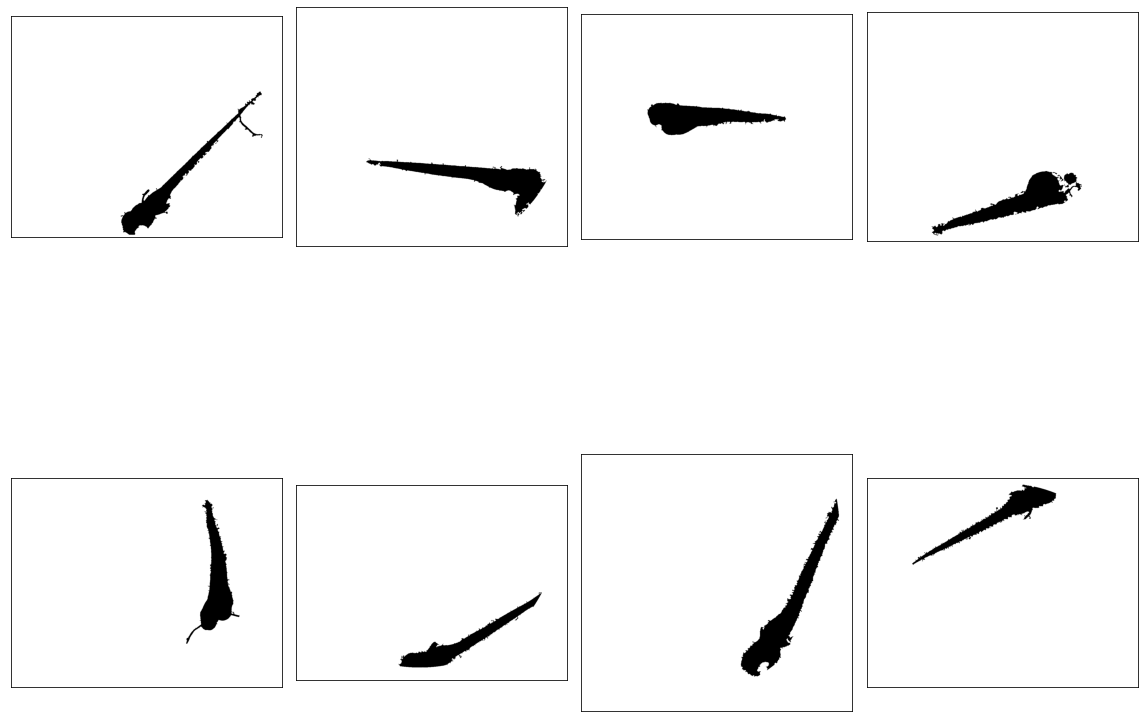

In [6]:
plot_fishes(fishes)

0.6860528548617183


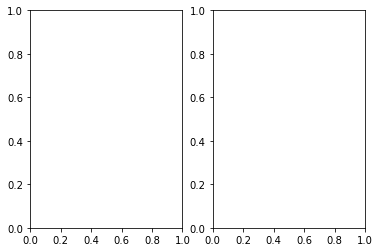

In [43]:
from skimage.color import label2rgb
from skimage.measure import label, regionprops_table
from src.utils import keep_2_largest_object
from skimage.exposure import equalize_hist, equalize_adapthist
import numpy as np

fig, ax = plt.subplots(1, 2)
index = 4
bbox = fishes[index].fish_props.bounding_box_well
mask = bbox.bound_img(fishes[index].fish_props.mask.og)
masked = equalize_adapthist(fishes[index].fish_props.cropped_og)
mean = np.mean(masked[masked >= 0])
print(mean)
th = (masked < mean / 3) * mask

(array([ 2, 13, 14, 29, 35, 46, 49, 51, 56, 58], dtype=int64),)
[0.         0.         0.         0.         0.         0.
 0.         0.44475029 0.         0.        ]
(array([], dtype=int64), array([], dtype=int64))


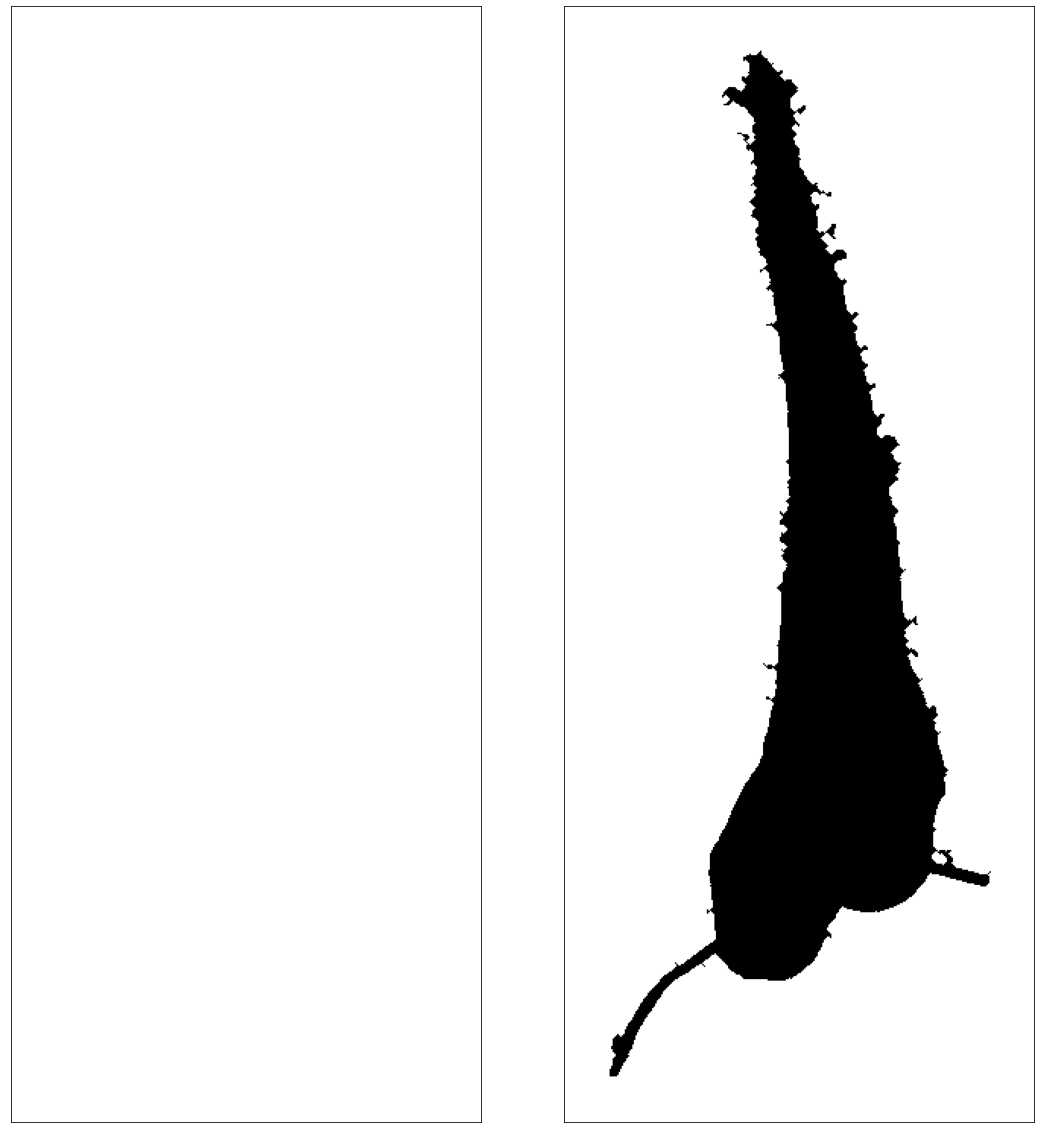

In [45]:
l = label(th.astype(float))
l_ = label2rgb(l)

rp = regionprops_table(l, properties=['label', 'eccentricity', 'image', 'area'])
wh = np.where(rp['eccentricity'] < 0.5)
print(wh)
print(rp['eccentricity'][wh])

z = np.zeros_like(th)


print(z.nonzero())

klo = keep_2_largest_object(th)

ax[0].hist(masked.ravel(), bins=256)
ax[1].imshow(l_, 'brg')
f_ = fishes[index].fish_props
f = f_.mask
plot_images([z, f.cropped + th])